# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
SP500_Sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
Mixed_Asset_Classes = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
FANG_Stocks = ['FB', 'AMZN', 'NFLX', 'GOOG']
Stocks_Bonds_Gold = ['SPY', 'QQQ', 'TLT', 'GLD']

# Pick one of the above
symbols = Stocks_Bonds_Gold

capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 3.0,
    'period' : 7,
    'use_regime_filter' : True,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

STOP LOSS!!!
STOP LOSS!!!


View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,93.60,93,entry,LONG,TLT
1,2005-09-14,1,123.21,63,entry,LONG,SPY
2,2005-09-14,2,39.18,195,entry,LONG,QQQ
3,2005-09-29,3,122.66,63,exit,LONG,SPY
4,2005-09-29,4,39.20,195,exit,LONG,QQQ


In [7]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
576,2021-05-04,415.62,2021-05-07,422.12,6.50,1664.00,256,114077.11,LONG,SPY
577,2021-05-11,414.21,2021-05-24,419.17,4.96,1170.57,236,115247.67,LONG,SPY
578,2021-06-03,330.00,2021-06-04,335.60,5.60,1019.20,182,116266.87,LONG,QQQ
579,2021-06-03,175.27,2021-07-02,167.29,-7.98,-4396.99,551,111869.89,LONG,GLD
580,2021-06-18,414.92,2021-06-24,425.10,10.18,2952.20,290,114822.08,LONG,SPY


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-07-08,124822.08,124822.08,124822.08,0,124822.08,1.00,-
2021-07-09,124822.08,124822.08,124822.08,0,124822.08,1.00,-
2021-07-12,124822.08,124822.08,124822.08,0,124822.08,1.00,-
2021-07-13,124822.08,124822.08,124822.08,0,124822.08,1.00,-
2021-07-14,124822.08,124822.08,124822.08,0,124822.08,1.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                    2005-09-02
end                                                      2021-07-14
beginning_balance                                             10000
ending_balance                                            124822.08
total_net_profit                                          114822.08
gross_profit                                              218615.83
gross_loss                                               -103793.75
profit_factor                                                  2.11
return_on_initial_capital                                   1148.22
annual_return_rate                                            17.25
trading_period                           15 years 10 months 12 days
pct_time_in_market                                            67.66
margin                                                         3.00
avg_leverage                                                   1.28
max_leverage                                    

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
GLD,"$17,469.92",0.25,0.15,0.61
SPY,"$34,572.28",0.25,0.30,1.20
TLT,"$23,473.66",0.25,0.20,0.82
QQQ,"$39,306.22",0.25,0.34,1.37
TOTAL,"$114,822.08",1.00,1.00,1.00


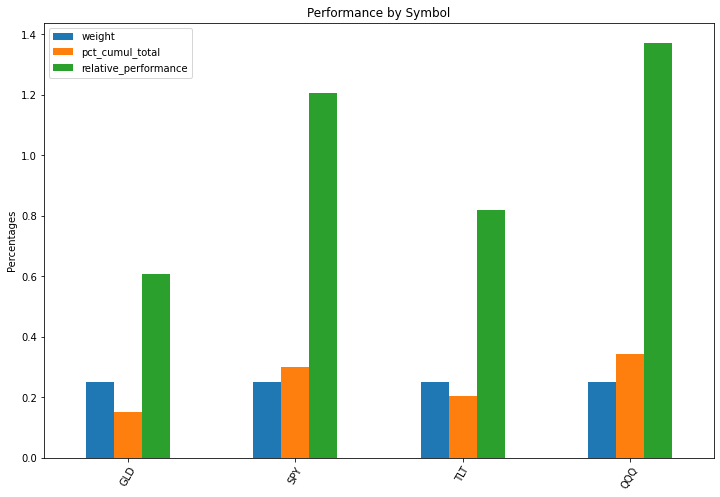

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,GLD,SPY,TLT,QQQ
GLD,1.00,0.04,0.14,0.03
SPY,0.04,1.00,-0.42,0.92
TLT,0.14,-0.42,1.00,-0.37
QQQ,0.03,0.92,-0.37,1.00


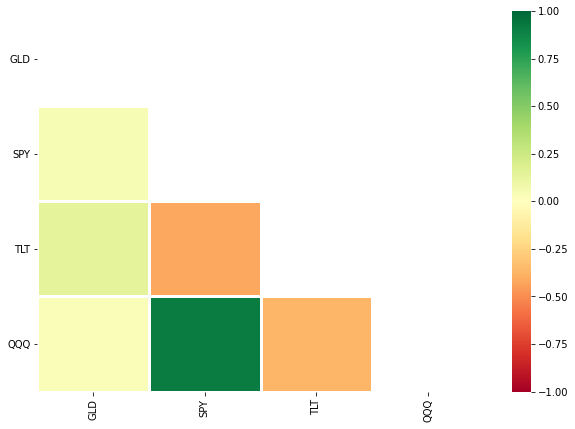

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

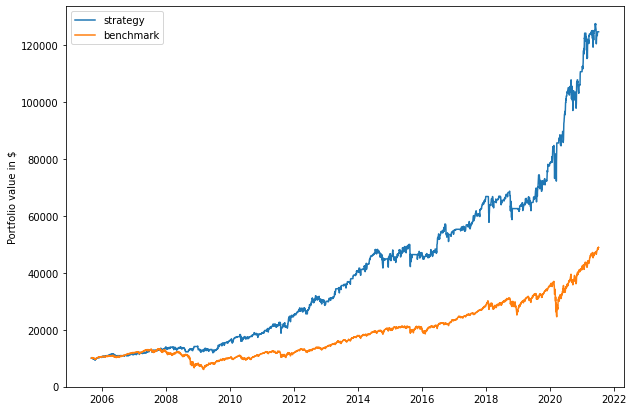

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,17.25,10.52
max_closed_out_drawdown,-16.79,-55.05
annualized_return_over_max_drawdown,1.03,0.19
best_month,20.92,23.49
worst_month,-14.76,-30.96
sharpe_ratio,0.98,0.61
sortino_ratio,1.08,0.72
monthly_std,3.83,4.60
annual_std,14.09,16.58


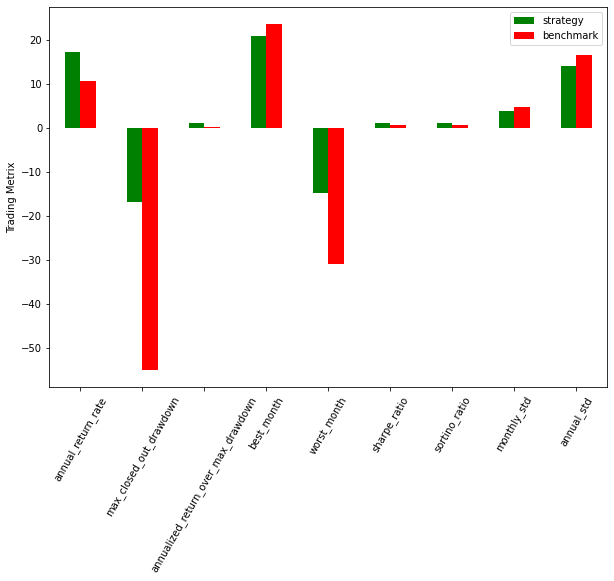

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.98
sharpe_ratio_max        1.03
sharpe_ratio_min        0.92
strategy risk           0.14
instrument risk         0.17
optimal target risk     0.98
half kelly criterion    0.49
aggressive leverage     5.89
moderate leverage       2.95
conservative leverage   2.77
dtype: float64